# External Functions
## LibraryStrings

In pure B there are only two built-in operators on strings: equality $=$ and inequality $\neq$.
This library provides several string manipulation functions, and assumes that STRINGS are
 sequences of unicode characters (in UTF-8 encoding).
You can obtain the definitions below by putting the following into your DEFINITIONS clause:

`DEFINITIONS "LibraryStrings.def"`

The file `LibraryStrings.def` is bundled with ProB and can be found in the `stdlib` folder.
You can also include the machine `LibraryStrings.mch` instead of the definition file;
 the machine defines some of the functions below as proper B functions (i.e., functions
 for which you can compute the domain and use constructs such as
 relational image).

In [1]:
::load
MACHINE Jupyter_LibraryStrings
DEFINITIONS "LibraryStrings.def"
END

Loaded machine: Jupyter_LibraryStrings

### STRING_APPEND

This external function takes two strings and concatenates them.

Type: $STRING \times STRING \rightarrow STRING $.

In [2]:
STRING_APPEND("abc","abc")

$\text{"abcabc"}$

In [3]:
STRING_APPEND("abc","")

$\text{"abc"}$

### STRING_LENGTH

This external function takes a string and returns the length.

Type: $STRING \rightarrow INTEGER$.

In [4]:
STRING_LENGTH("abc")

$3$

In [5]:
STRING_LENGTH("")

$0$

### STRING_SPLIT

This external function takes two strings and separates the first string
 according to the separator specified by the second string.

Type: $STRING \times STRING \rightarrow \mathit{seq}(STRING) $.

In [6]:
STRING_SPLIT("filename.ext",".")

$\{(1\mapsto\text{"filename"}),(2\mapsto\text{"ext"})\}$

In [7]:
STRING_SPLIT("filename.ext","/")

$\{(1\mapsto\text{"filename.ext"})\}$

In [8]:
STRING_SPLIT("usr/local/lib","/")

$\{(1\mapsto\text{"usr"}),(2\mapsto\text{"local"}),(3\mapsto\text{"lib"})\}$

In [9]:
STRING_SPLIT("",".")

$\{(1\mapsto\text{""})\}$

I am not sure the following result makes sense, maybe a sequence of all characters is more appropriate?

In [10]:
STRING_SPLIT("usr/local/lib","")

$\{(1\mapsto\text{"usr/local/lib"})\}$

In [11]:
STRING_SPLIT("usr/local/lib","cal")

$\{(1\mapsto\text{"usr/lo"}),(2\mapsto\text{"/lib"})\}$

### STRING_JOIN
This external function takes a sequence of strings and a separator string
 and joins the strings together inserting the separators as often as needed.
It is the inverse of the `STRING_SPLIT` function.

Type: $\mathit{seq}(STRING) \times STRING \rightarrow STRING $.

In [12]:
STRING_JOIN(["usr","local","lib"],"/")

$\text{"usr/local/lib"}$

In [13]:
STRING_JOIN(["usr/lo","/lib"],"cal")

$\text{"usr/local/lib"}$

In [14]:
STRING_JOIN(["usr/local/lib"],"")

$\text{"usr/local/lib"}$

### STRING_CHARS

This external function takes a strings splits it into a sequence
of the individual characters. Each character is represented by a string.

Type: $STRING \rightarrow \mathit{seq}(STRING) $.

In [15]:
STRING_CHARS("")

$\renewcommand{\emptyset}{\mathord\varnothing}\emptyset$

In [16]:
STRING_CHARS("abc")

$\{(1\mapsto\text{"a"}),(2\mapsto\text{"b"}),(3\mapsto\text{"c"})\}$

In [17]:
STRING_JOIN(STRING_CHARS("abc"),".")

$\text{"a.b.c"}$

### STRING_CODES

This external function takes a strings splits it into a sequence
of the individual characters. Each character is represented by a natural number
 (the ASCII or Unicode representation of the character).

Type: $STRING \rightarrow \mathit{seq}(INTEGER) $.

In [18]:
STRING_CODES("")

$\renewcommand{\emptyset}{\mathord\varnothing}\emptyset$

In [19]:
STRING_CODES("AZ az 09")

$\{(1\mapsto 65),(2\mapsto 90),(3\mapsto 32),(4\mapsto 97),(5\mapsto 122),(6\mapsto 32),(7\mapsto 48),(8\mapsto 57)\}$

### CODES_TO_STRING

This external function is the inverse of the ```STRING_CODES``` function above.

Type: $\mathit{seq}(INTEGER)\rightarrow  STRING$.

In [20]:
CODES_TO_STRING([65,66,67])

$\text{"ABC"}$

### STRING_TO_UPPER

This external function converts a string to upper-case letters. It currently converts also diacritical marks (this behaviour may in future be controlled by an additional flag or option).

Type: $STRING \rightarrow STRING $.

In [21]:
STRING_TO_UPPER("abc_ABC")

$\text{"ABC_ABC"}$

In [22]:
STRING_TO_UPPER("az-AZ-09-äàöù-ÄÖ")

$\text{"AZ-AZ-09-AAOU-AO"}$

In [23]:
STRING_TO_UPPER("")

$\text{""}$

### STRING_TO_LOWER

This external function converts a string to lower-case letters. It currently converts also diacritical marks (this behaviour may in future be controlled by an additional flag or option).

Type: $STRING \rightarrow STRING $.

In [24]:
STRING_TO_LOWER("az-AZ-09-äàöù-ÄÖ")

$\text{"az-az-09-aaou-ao"}$

### SUB_STRING

This external function takes a strings a position and a sequence and produces a corresponding substring.
The numbering starts at 1 and the position must be at least 1, but can extend beyond the end of the string.

Type: $STRING \times INTEGER \times INTEGER \rightarrow STRING $.

In [25]:
SUB_STRING("abcdefg",1,3)

$\text{"abc"}$

In [26]:
SUB_STRING("abcdefg",1,100)

$\text{"abcdefg"}$

In [27]:
SUB_STRING("abcdefg",4,2)

$\text{"de"}$

In [28]:
SUB_STRING("abcdefg",3,0)

$\text{""}$

In [29]:
SUB_STRING("abcdefg",11,3)

$\text{""}$

### STRING_IS_INT


This external predicate takes a string and is true if the string represents an integer.

Type: $STRING $.

In [30]:
STRING_IS_INT("1204")

$\mathit{TRUE}$

In [31]:
STRING_IS_INT("-1204")

$\mathit{TRUE}$

In [32]:
STRING_IS_INT(" - 1204")

$\mathit{TRUE}$

In [33]:
STRING_IS_INT("1.1")

$\mathit{FALSE}$

In [34]:
STRING_IS_INT("1.0")

$\mathit{FALSE}$

In [35]:
STRING_IS_INT("a")

$\mathit{FALSE}$

In [36]:
STRING_IS_INT("1000000000000000000000000000")

$\mathit{TRUE}$

In [37]:
STRING_IS_INT("-00001")

$\mathit{TRUE}$

In [38]:
STRING_IS_INT("00002")

$\mathit{TRUE}$

### STRING_TO_INT

This external function takes a string and converts it into an integer.
An error is raised if this cannot be done.
It is safer to first check with `STRING_IS_INT` whether the conversion can be done.

Type: $STRING \rightarrow INTEGER$.

In [39]:
STRING_TO_INT("1024")

$1024$

In [40]:
STRING_TO_INT(" - 00001")

$-1$

### INT_TO_STRING

This external function converts an integer to a string representation.

Type: $INTEGER  \rightarrow STRING $.

In [41]:
INT_TO_STRING(1024)

$\text{"1024"}$

In [42]:
INT_TO_STRING(-1024)

$\text{"-1024"}$

In [43]:
INT_TO_STRING(STRING_TO_INT(" - 00001"))

$\text{"-1"}$

In [44]:
STRING_TO_INT(INT_TO_STRING(-1))=-1

$\mathit{TRUE}$

### DEC_STRING_TO_INT

This external function takes a decimal string (with optional decimal places) and converts it to an integer with the given precision (rounding if required).

Type: $STRING \times INTEGER  \rightarrow INTEGER$.

In [45]:
DEC_STRING_TO_INT("1024",0)

$1024$

In [46]:
DEC_STRING_TO_INT("1024",2)

$102400$

In [47]:
DEC_STRING_TO_INT("1024",-1)

$102$

In [48]:
DEC_STRING_TO_INT("1025",-1)

$103$

In [49]:
DEC_STRING_TO_INT(" -1025",-1)

$-103$

In [50]:
DEC_STRING_TO_INT("1024.234",2)

$102423$

In [51]:
DEC_STRING_TO_INT("1024",100)

$10240000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$

In [52]:
DEC_STRING_TO_INT("10000000000000000000000000000000000",-32)=100

$\mathit{TRUE}$

### INT_TO_DEC_STRING

This external function converts an integer to a decimal string representation
 with the precision provided by the second argument.

Type: $INTEGER  \times INTEGER  \rightarrow STRING $.

In [53]:
INT_TO_DEC_STRING(1204,2)

$\text{"12.04"}$

In [54]:
INT_TO_DEC_STRING(-1204,3)

$\text{"-1.204"}$

In [55]:
INT_TO_DEC_STRING(0,2)

$\text{"0.00"}$

In [56]:
INT_TO_DEC_STRING(1204,-2)

$\text{"120400"}$

In [57]:
INT_TO_DEC_STRING(-10,3)

$\text{"-0.010"}$

### INT_TO_HEX_STRING

This external function converts an integer to a hexadecimal string representation.

Type: $INTEGER  \rightarrow STRING $.

In [58]:
INT_TO_HEX_STRING(254)

$\text{"fe"}$

In [59]:
INT_TO_HEX_STRING(0)

$\text{"0"}$

In [60]:
INT_TO_HEX_STRING(-254)

$\text{"-fe"}$

In [61]:
INT_TO_HEX_STRING(2**100-1)

$\text{"fffffffffffffffffffffffff"}$

### TO_STRING

This external function converts a B data value to a string representation.

Type: $\tau \rightarrow STRING$.

In [62]:
TO_STRING(1024)

$\text{"1024"}$

In [63]:
TO_STRING("1024")

$\text{"1024"}$

In [64]:
TO_STRING({2,3,5})

$\text{"{2,3,5}"}$

In [65]:
TO_STRING((TRUE,3,{11|->rec(a:22,b:33)}))

$\text{"(TRUE|->3|->{(11|->rec(a:22,b:33))})"}$

### FORMAT_TO_STRING
This external function takes a format string and a B sequence of values and generates an output string, where the values have been inserted into the format string in place of the `~w` placeholders.
 - the length of sequence must correspond to the number of `~w` in the format string.
 - the format string follows the conventions of SICStus Prolog.
    E.g., one can use `~n` for newlines.


Type: $(STRING*seq(\tau)) \rightarrow STRING$.

In [66]:
FORMAT_TO_STRING("two to the power ten = ~w",[2**10])

$\text{"two to the power ten = 1024"}$

In [67]:
FORMAT_TO_STRING("My two sets are ~w and ~w",[1..2,2..1])

$\text{"My two sets are {1,2} and {}"}$

#### Format Strings

Various external functions and predicates work with format strings.
ProB uses the conventions of the SICStus Prolog format string.
 - `~n` inserts a newline into the generated output
 - `~Nn` where N is a number: it inserts $N$ newlines into the output
 - `~w` inserts the next argument into the generated output
 - `~i` consumes the next argument but ignores it; i.e., nothing is inserted into the output
 - `~~` inserts the tilde symbol into the generated output
 - `~N` inserts a newline if not at the beginning of the line

SICStus Prolog also uses a few other formatting codes, such as `~@`, `~p`,... which should not be used.

### STRINGIFY

This external function converts a B expression to a string representation of the expression, not the value.
It can be used to obtain the name of variables.
Warning: ProB may simplify and rewrite expressions (you can turn this off by setting the OPTIMIZE_AST preference to false).

Type: $\tau \rightarrow STRING$.

In [68]:
STRINGIFY(dom({1|->2}))

$\text{"dom({1 |-> 2})"}$

Compare this with the result of TO_STRING:

In [69]:
TO_STRING(dom({1|->2}))

$\text{"{1}"}$

In [70]:
:table rec(stringify:STRINGIFY("abc"),tostring:TO_STRING("abc"))

|stringify|tostring|
|---|---|
|"\"abc\""|"abc"|


## Choose Operators
You can obtain access to the definitions below by putting the following into your DEFINITIONS clause:
 `DEFINITIONS "CHOOSE.def"`

### Choose

This external function takes a set and returns an element of the set.
This is a proper mathematical function, i.e., it will always return the same value
given the same argument.
It is also known as Hilbert's operator.

The operator raises an error when it is called with an empty set.
Also, it is not guaranteed to work for infinite sets.

Type: $POW(T) \rightarrow T$.

In [71]:
::load
MACHINE Jupyter_CHOOSE
DEFINITIONS "CHOOSE.def"
END

Loaded machine: Jupyter_CHOOSE

In [72]:
CHOOSE(1..3)

$1$

In [73]:
CHOOSE({1,2,3})

$1$

In [74]:
CHOOSE({"a","b","c"})

$\text{"a"}$

In [75]:
CHOOSE(NATURAL)

$0$

In [76]:
CHOOSE(INTEGER)

$0$

The operator is useful for writing WHILE loops or recursive functions which manipulate sets.
The following example defines a recursive summation function using the CHOOSE operator.

```
MACHINE RecursiveSigmaCHOOSEv3
DEFINITIONS
  "Choose.def"
ABSTRACT_CONSTANTS sigma
PROPERTIES
  sigma: POW(INTEGER) <-> INTEGER &
  sigma = %x.(x:POW(INTEGER) |
              IF x={} THEN 0 ELSE
                LET c BE c=CHOOSE(x) IN c+sigma(x-{c}) END
              END
              )
ASSERTIONS
 sigma({3,5,7}) = 15;
END
```


### MU

Just like CHOOSE, this external function takes a set and returns an element of the set.
In contrast to CHOOSE, it is only defined for singleton sets.
The operator raises an error when it is called with an empty set or a set containing more than one element.

Type: $POW(T) \rightarrow T$.

In [77]:
MU({2})

$2$

In [78]:
MU({2})+MU({x|x>0 & x<2})

$3$

## Sorting Sets
You can obtain access to the definitions below by putting the following into your DEFINITIONS clause:
`DEFINITIONS "SORT.def"`

Alternatively you can use the following if you use ProB prior to version 1.7.1:
`
DEFINITIONS
 SORT(X) == [];
 EXTERNAL_FUNCTION_SORT(T) == (POW(T)-->seq(T));
`

This external function SORT takes a set and translates it into a B sequence.
It uses ProB's internal order for sorting the elements.
It will not work for infinite sets.
Type: $POW(\tau) \rightarrow seq(\tau)$.

In [79]:
::load
MACHINE Jupyter_SORT
DEFINITIONS "SORT.def"
END

Loaded machine: Jupyter_SORT

In [80]:
SORT(1..3)

$\{(1\mapsto 1),(2\mapsto 2),(3\mapsto 3)\}$

In [81]:
SORT({3*3,3+3,3**3})

$\{(1\mapsto 6),(2\mapsto 9),(3\mapsto 27)\}$

In [82]:
SORT({"ab","aa","a","b","10","1","2","11"})

$\{(1\mapsto\text{"1"}),(2\mapsto\text{"10"}),(3\mapsto\text{"11"}),(4\mapsto\text{"2"}),(5\mapsto\text{"a"}),(6\mapsto\text{"aa"}),(7\mapsto\text{"ab"}),(8\mapsto\text{"b"})\}$

In [83]:
SORT({("a"|->1),("b"|->0),("a"|->0)})

$\{(1\mapsto(\text{"a"}\mapsto 0)),(2\mapsto(\text{"a"}\mapsto 1)),(3\mapsto(\text{"b"}\mapsto 0))\}$

A related external function is LEQ_SYM_BREAK which allows one to compare values of arbitrary type.
Calls to this external function are automatically
inserted by ProB for symmetry breaking of quantifiers.
It should currently not be used for sets or sequences.

The SORT.def file also contains a definition for the SQUASH operator which takes a sequence with gaps and completes it into a proper sequence:

In [84]:
SQUASH({0|->"a",100|->"c",1001 |->"d",4|->"b", 44|->"c"})

$\{(1\mapsto\text{"a"}),(2\mapsto\text{"b"}),(3\mapsto\text{"c"}),(4\mapsto\text{"c"}),(5\mapsto\text{"d"})\}$

## Strongly Connected Components
You can obtain access to the definitions below by putting the following into your DEFINITIONS clause:
`DEFINITIONS "SCCS.def"`

Alternatively you can use the following if you use ProB prior to version 1.9.0:
`
DEFINITIONS
  EXTERNAL_FUNCTION_SCCS(T) == (T<->T) --> POW(POW(T));
  SCCS(relation) == {};
`

This external function SCCS takes a binary relation and computes the set of strongly connected components.
Type: $POW(\tau \times \tau) \rightarrow POW(POW(\tau))$.

In [85]:
::load
MACHINE Jupyter_SCCS
DEFINITIONS "SCCS.def"
END

Loaded machine: Jupyter_SCCS

In [86]:
SCCS({1|->2,2|->1,2|->3,3|->4,4|->3})

$\{\{1,2\},\{3,4\}\}$

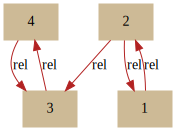

In [87]:
:dot expr_as_graph ("rel",{1|->2,2|->1,2|->3,3|->4,4|->3})

In [88]:
SCCS({x,y|x:2..100 & y:2..100 & (x mod y = 0 or y mod x =0)})

$\{\{2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,57,58,60,62,63,64,65,66,68,69,70,72,74,75,76,77,78,80,81,82,84,85,86,87,88,90,91,92,93,94,95,96,98,99,100\},\{53\},\{59\},\{61\},\{67\},\{71\},\{73\},\{79\},\{83\},\{89\},\{97\}\}$

## LibraryMeta
This library provides various meta information about ProB and the current model.
You can obtain the definitions below by putting the following into your DEFINITIONS clause:

`DEFINITIONS "LibraryMeta.def"`

The file `LibraryMeta.def` is also bundled with ProB and can be found in the `stdlib` folder.

In [89]:
::load
MACHINE Jupyter_LibraryMeta
DEFINITIONS "LibraryMeta.def"
END

Loaded machine: Jupyter_LibraryMeta

### PROB_INFO_STR
This external function provides access to various information strings about ProB.
Type: $STRING \rightarrow STRING$.

In [90]:
PROB_INFO_STR("prob-version")

$\text{"1.11.1-final"}$

In [91]:
PROB_INFO_STR("prob-revision")

$\text{"1125ea39af78125a39093c65a0af783b7636b362"}$

In [92]:
PROB_INFO_STR("prob-last-changed-date")

$\text{"Wed Dec 29 13:14:39 2021 +0100"}$

In [93]:
PROB_INFO_STR("java-version")

$\text{"1.17.35\"\n"}$

In [94]:
PROB_INFO_STR("java-command-path")

$\text{"/Library/Java/JavaVirtualMachines/temurin-17.jdk/Contents/Home/bin/java"}$

In [95]:
PROB_INFO_STR("current-time")

$\text{"6/1/2022 - 13h37 50s"}$

Another command is PROB_INFO_STR("parser-version") which does not work within Jupyter.

### PROB_STATISTICS
This external function provides access to various statistics in the form of integers about ProB.
Type: $STRING \rightarrow INTEGER$.

In [96]:
PROB_STATISTICS("prolog-memory-bytes-used")

$166651936$

In [97]:
PROB_STATISTICS("states")

$1$

In [98]:
PROB_STATISTICS("transitions")

$0$

In [99]:
PROB_STATISTICS("processed-states")

$0$

In [100]:
PROB_STATISTICS("current-state-id")

$-1$

In [101]:
PROB_STATISTICS("now-timestamp")

$1641472670$

In [102]:
PROB_STATISTICS("prolog-runtime")

$2295$

In [103]:
PROB_STATISTICS("prolog-walltime")

$18724$

Other possible information fields are prolog-memory-bytes-free,
prolog-global-stack-bytes-used,
prolog-local-stack-bytes-used,
prolog-global-stack-bytes-free,
prolog-local-stack-bytes-free,
prolog-trail-bytes-used,
prolog-choice-bytes-used,
prolog-atoms-bytes-used,
prolog-atoms-nb-used,
prolog-gc-count,
prolog-gc-time.

### PROJECT_STATISTICS
This external function provides access to various statistics in the form of integers about the current specification being processed, with all auxiliary files (i.e., project).
Type: $STRING \rightarrow INTEGER$.

In [104]:
PROJECT_STATISTICS("constants")

$0$

In [105]:
PROJECT_STATISTICS("variables")

$0$

In [106]:
PROJECT_STATISTICS("properties")

$0$

In [107]:
PROJECT_STATISTICS("invariants")

$0$

In [108]:
PROJECT_STATISTICS("operations")

$0$

In [109]:
PROJECT_STATISTICS("static_assertions")

$0$

In [110]:
PROJECT_STATISTICS("dynamic_assertions")

$0$

### PROJECT_INFO
This external function provides access to various information strings about the current specification being processed, with all auxiliary files (i.e., project).
Type: $STRING \rightarrow POW(STRING)$.

In [111]:
PROJECT_INFO("files")

$\{\text{"(machine from Jupyter cell).mch"},\text{"LibraryMeta.def"}\}$

In [112]:
PROJECT_INFO("main-file")

$\{\text{"(machine from Jupyter cell).mch"}\}$

In [113]:
PROJECT_INFO("variables")

$\renewcommand{\emptyset}{\mathord\varnothing}\emptyset$

In [114]:
PROJECT_INFO("constants")

$\renewcommand{\emptyset}{\mathord\varnothing}\emptyset$

In [115]:
PROJECT_INFO("sets")

$\renewcommand{\emptyset}{\mathord\varnothing}\emptyset$

In [116]:
PROJECT_INFO("operations")

$\renewcommand{\emptyset}{\mathord\varnothing}\emptyset$

In [117]:
PROJECT_INFO("assertion_labels")

$\renewcommand{\emptyset}{\mathord\varnothing}\emptyset$

In [118]:
PROJECT_INFO("invariant_labels")

$\renewcommand{\emptyset}{\mathord\varnothing}\emptyset$

In [119]:
PROJECT_INFO("sha-hash")

$\{\text{"9541282a9b1c250d7244201817fbc6f332a22940"}\}$

### MACHINE_INFO
This external function provides access to various information strings about B machines being processed.
Type: $STRING \rightarrow STRING$.

In [120]:
MACHINE_INFO("Jupyter_LibraryMeta","TYPE")

$\text{"abstract_machine"}$

## LibraryIO

This library provides various input/output facilities.
It is probably most useful for debugging, but can also be used to write B machines
which can read and write data.
You can obtain the definitions below by putting the following into your DEFINITIONS clause:

`DEFINITIONS "LibraryIO.def"`

The file `LibraryIO.def` is also bundled with ProB and can be found in the `stdlib` folder.

## LibraryXML

This library provides various functions to read and write XML data from file and strings.
You can obtain the definitions below by putting the following into your DEFINITIONS clause:

`DEFINITIONS "LibraryXML.def"`

The file `LibraryXML.def` is also bundled with ProB and can be found in the `stdlib` folder.

### Internal Data Type

An XML document is represented using the type seq(XML_ELement_Type), i.e., a sequence
 of XML elements, whose type is defined by the following (included in the LibraryXML.def file):

```
 XML_ELement_Type == 
      struct(
        recId: NATURAL1,
        pId:NATURAL,
        element:STRING,
        attributes: STRING +-> STRING,
        meta: STRING +-> STRING
        );
```

### Files and Strings

XML documents can either be stored in a file or in a B string.

In [121]:
::load
MACHINE Jupyter_LibraryXML
DEFINITIONS "LibraryXML.def"
END

Loaded machine: Jupyter_LibraryXML

### READ_XML_FROM_STRING
This external function takes an XML document string and converts into into the B format seq(XML_ELement_Type)}.
Note that all strings in ProB are encoded using UTF-8, so no encoding argument has to be provided.

In [122]:
READ_XML_FROM_STRING('''
<?xml version="1.0" encoding="ASCII"?>
 <Data version= "0.1">
 <Tag1 elemID="ID1" attr1="value1" />
 </Data>
''')

$\{(1\mapsto\mathit{rec}(\mathit{attributes}\in\{(\text{"version"}\mapsto\text{"0.1"})\},\mathit{element}\in\text{"Data"},\mathit{meta}\in\{(\text{"xmlLineNumber"}\mapsto\text{"3"})\},\mathit{pId}\in 0,\mathit{recId}\in 1)),(2\mapsto\mathit{rec}(\mathit{attributes}\in\{(\text{"attr1"}\mapsto\text{"value1"}),(\text{"elemID"}\mapsto\text{"ID1"})\},\mathit{element}\in\text{"Tag1"},\mathit{meta}\in\{(\text{"xmlLineNumber"}\mapsto\text{"4"})\},\mathit{pId}\in 1,\mathit{recId}\in 2))\}$

### READ_XML

This external function can read in an XML document from file. In contrast to READ_XML_FROM_STRING
it also takes a second argument specifying the encoding used.
ProB cannot as of now detect the encoding from the XML header.
In future this argument may be removed.
Currently it can take these values:
"auto","ISO-8859-1","ISO-8859-2","ISO-8859-15",
                    "UTF-8","UTF-16","UTF-16LE","UTF-16BE","UTF-32","UTF-32LE","UTF-32BE",
                    "ANSI\_X3.4-1968", "windows 1252".

## LibraryHash

This library provides various facilities to compute hash values for B values.
You can obtain the definitions below by putting the following into your DEFINITIONS clause:

`DEFINITIONS "LibraryHash.def"`

The file `LibraryHash.def` is also bundled with ProB and can be found in the `stdlib` folder.

In [123]:
::load
MACHINE Jupyter_LibraryHash
DEFINITIONS "LibraryHash.def"
END

Loaded machine: Jupyter_LibraryHash

### HASH

This external function converts a B data value to an integer hash value. It uses the ```term_hash``` predicate of SICStus Prolog. It will generate an integer that can be efficiently handled by ProB, but may generate collisions.

Type: $\tau \rightarrow INTEGER$.

In [124]:
HASH({1,2,4})

$92915201$

In [125]:
HASH({1,2,5})

$191034877$

In [126]:
i<: 1..7 & j<:1..7 & i /= j & HASH(i)=HASH(j)

$\mathit{FALSE}$

### SHA_HASH

This external function converts a B data value to a SHA hash value represented as a sequence of bytes. It is unlikely to generate a collision.

Type: $\tau \rightarrow INTEGER$.

In [127]:
SHA_HASH({1,2,4})

$\{(1\mapsto 37),(2\mapsto 168),(3\mapsto 75),(4\mapsto 91),(5\mapsto 175),(6\mapsto 1),(7\mapsto 8),(8\mapsto 58),(9\mapsto 13),(10\mapsto 207),(11\mapsto 7),(12\mapsto 42),(13\mapsto 222),(14\mapsto 208),(15\mapsto 212),(16\mapsto 29),(17\mapsto 243),(18\mapsto 31),(19\mapsto 27),(20\mapsto 154)\}$

In [128]:
SHA_HASH({1,2,5})

$\{(1\mapsto 149),(2\mapsto 81),(3\mapsto 45),(4\mapsto 24),(5\mapsto 177),(6\mapsto 25),(7\mapsto 74),(8\mapsto 30),(9\mapsto 204),(10\mapsto 7),(11\mapsto 143),(12\mapsto 202),(13\mapsto 136),(14\mapsto 116),(15\mapsto 148),(16\mapsto 247),(17\mapsto 6),(18\mapsto 221),(19\mapsto 245),(20\mapsto 52)\}$

In [129]:
i<: 1..7 & j<:1..7 & i /= j & SHA_HASH(i)=SHA_HASH(j)

$\mathit{FALSE}$

### SHA_HASH_HEX

This external function converts a B data value to a SHA hash value represented as a hexadecimal string. It is unlikely to generate a collision.

Type: $\tau \rightarrow STRING$.

In [130]:
SHA_HASH_HEX({1,2,4})

$\text{"25a84b5baf01083a0dcf072aded0d41df31f1b9a"}$

In [131]:
SHA_HASH_HEX({1,2,5})

$\text{"95512d18b1194a1ecc078fca887494f706ddf534"}$

In [132]:
SHA_HASH_HEX({x|x<:1..8 & card(x)=2})

$\text{"6bd1d8beefa14ea131285d11bbf8580c5f31fe78"}$

In [133]:
SHA_HASH_HEX(0)

$\text{"068948b4d423a0db5fd1574edad799005fc456e0"}$

In [134]:
SHA_HASH_HEX(SHA_HASH_HEX(0))

$\text{"55b9c89f79362578c3641774db978b5455be5bfd"}$

## LibraryRegex

This library provides various facilities for pattern matching with regular expressions.
You can obtain the definitions below by putting the following into your DEFINITIONS clause:

`DEFINITIONS "LibraryRegex.def"`

The file `LibraryRegex.def` is also bundled with ProB and can be found in the `stdlib` folder (as of version 1.8.3-beta4).

In [135]:
::load
MACHINE Jupyter_LibraryRegex
DEFINITIONS "LibraryRegex.def"; "LibraryStrings.def"
END

Loaded machine: Jupyter_LibraryRegex

The library works on B strings and regular expression patterns are also written as B strings.
The syntax used is the ECMAScript syntax: http://www.cplusplus.com/reference/regex/ECMAScript/
The library is currently implemented using the C++ standard library.
Below we repeat some information from http://www.cplusplus.com/reference/regex/ECMAScript/ for convenience.

The library now does support UTF-8 encoded strings and patterns.
Note that ProB only supports UTF-8 for both B machines and for any strings and Unicode files it processes.

#### Operators/Quantifiers

More precisely the library accepts the following operators:

| Syntax | Descr. | Matches |
| --- | --- | --- |
| ```*``` | 0 or more |The preceding atom is matched 0 or more times. |
| ```+``` |1 or more |The preceding atom is matched 1 or more times. |
| ```?``` |0 or 1 |The preceding atom is optional (matched either 0 times or once). |
| ```{int}``` |int |The preceding atom is matched exactly int times. |
| ```{int,}``` |int or more |The preceding atom is matched int or more times. |
| ```{min,max}``` |between min and max |The preceding atom is matched at least min times, but not more than max. |


There is also the ```|``` separator.
It separates two alternative patterns or subpatterns.




#### Characters
The library accepts the following special characters:

| Syntax | Descr. | Matches |
| --- | --- | --- |
| ```.```	| not newline	| any character except line terminators (LF, CR, LS, PS).|
| ```\t```	| tab (HT)	| a horizontal tab character (same as \u0009).|
| ```\n```	| newline (LF)	| a newline (line feed) character (same as \u000A).|
| ```\v```	| vertical tab (VT)	| a vertical tab character (same as \u000B).|
| ```\f```	| form feed (FF)	| a form feed character (same as \u000C).|
| ```\r```	| carriage return (CR)	| a carriage return character (same as \u000D).|
| ```\cletter```	| control code	| a control code character whose code unit value is the same as the remainder of dividing the code unit value of letter by 32.|

For example: ```\ca``` is the same as ```\u0001```, ```\cb``` the same as ```\u0002```, and so on...

| Syntax | Descr. | Matches |
| --- | --- | --- |
| ```\xhh```| ASCII character| a character whose code unit value has an hex value equivalent to the two hex digits hh.|

For example: ```\x4c``` is the same as L, or ```\x23``` the same as #.

| Syntax | Descr. | Matches |
| --- | --- | --- |
| ```\uhhhh```| unicode character| a character whose code unit value has an hex value equivalent to the four hex digits hhhh.|
| ```\0```| null| a null character (same as \u0000).|
| ```\int```| backreference| the result of the submatch whose opening parenthesis is the int-th (int shall begin by a digit other than 0). See groups below for more info.|
| ```\d```| digit| a decimal digit character (same as [[:digit:]]).|
|  ```\D```| not digit| any character that is not a decimal digit character (same as [^[:digit:]]).|
|  ```\s```| whitespace| a whitespace character (same as [[:space:]]).|
| ```\S```| not whitespace| any character that is not a whitespace character (same as [^[:space:]]).|
|  ```\w```| word| an alphanumeric or underscore character (same as [_[:alnum:]]).|
|  ```\W```| not word| any character that is not an alphanumeric or underscore character (same as [^_[:alnum:]]).|
|  ```\character```| character| the character character as it is, without interpreting its special meaning within a regex expression.|

Any character can be escaped except those which form any of the special character sequences above.
Needed for: ```^ $ \ . * + ? ( ) [ ] { } |```


| Syntax | Descr. | Matches |
| --- | --- | --- |
| ```[class]```| character class| the target character is part of the class (see character classes below)|
| ```[^class]```| negated character class| the target character is not part of the class (see character classes below)|





#### Groups

Groups allow to apply quantifiers to a sequence of characters (instead of a single character). There are two kinds of groups:

| characters| description| effects| 
| --- | --- | --- |
| ```(subpattern)```| Group| Creates a backreference.
| ```(?:subpattern)```| Passive group| Does not create a backreference.

#### Assertions
Assertions are conditions that do not consume characters in the target sequence: they do not describe a character, but a condition that must be fulfilled before or after a character.

characters	description	condition for match

- ```^```	Beginning of line	Either it is the beginning of the target sequence, or follows a line terminator.
- ```$```	End of line	Either it is the end of the target sequence, or precedes a line terminator.
- ```\b```	Word boundary	The previous character is a word character and the next is a non-word character (or vice-versa).
Note: The beginning and the end of the target sequence are considered here as non-word characters.
- ```\B```	Not a word boundary	The previous and next characters are both word characters or both are non-word characters.
Note: The beginning and the end of the target sequence are considered here as non-word characters.
- ```(?=subpattern)```	Positive lookahead	The characters following the assertion must match subpattern, but no characters are consumed.
- ```(?!subpattern)```	Negative lookahead	The characters following the assertion must not match subpattern, but no characters are consumed.


#### Character classes
A character class defines a category of characters. It is introduced by enclosing its descriptors in square brackets ([ and ]).
The regex object attempts to match the entire character class against a single character in the target sequence (unless a quantifier specifies otherwise).

The character class can contain any combination of:
Individual characters: Any character specified is considered part of the class (except the characters \, [, ] and - when they have a special meaning as described in the following paragraphs).
For example:
```[abc]``` matches a, b or c.
```[^xyz]``` matches any character except x, y and z.
Ranges: They can be specified by using the hyphen character (-) between two valid characters.
For example:
```[a-z]``` matches any lowercase letter (a, b, c, ... until z).
```[abc1-5]``` matches either a, b or c, or a digit between 1 and 5.
POSIX-like classes: A whole set of predefined classes can be added to a custom character class. There are three kinds:

class	description	notes
- ```[:classname:]```	character class	Uses the regex traits' isctype member with the appropriate type gotten from applying lookup_classname member on classname for the match.
- ```[.classname.]```	collating sequence	Uses the regex traits' lookup_collatename to interpret classname.
- ```[=classname=]```	character equivalents	Uses the regex traits' transform_primary of the result of regex_traits::lookup_collatename for classname to check for matches.

The choice of available classes depend on the regex traits type and on its selected locale. But at least the following character classes shall be recognized by any regex traits type and locale:

class	description	equivalent (with regex_traits, default locale)
- ```[:alnum:]```	alpha-numerical character	isalnum
- ```[:alpha:]```	alphabetic character	isalpha
- ```[:blank:]```	blank character	isblank
- ```[:cntrl:]```	control character	iscntrl
- ```[:digit:]```	decimal digit character	isdigit
- ```[:graph:]```	character with graphical representation	isgraph
- ```[:lower:]```	lowercase letter	islower
- ```[:print:]```	printable character	isprint
- ```[:punct:]```	punctuation mark character	ispunct
- ```[:space:]```	whitespace character	isspace
- ```[:upper:]```	uppercase letter	isupper
- ```[:xdigit:]```	hexadecimal digit character	isxdigit
- ```[:d:]```	decimal digit character	isdigit
- ```[:w:]```	word character	isalnum
- ```[:s:]```	whitespace character	isspace

Please note that the brackets in the class names are additional to those opening and closing the class definition.
For example:
```[[:alpha:]]``` is a character class that matches any alphabetic character.
```[abc[:digit:]]``` is a character class that matches a, b, c, or a digit.
```[^[:space:]]``` is a character class that matches any character except a whitespace.

Escape characters: All escape characters described above can also be used within a character class specification. The only change is with \b, that here is interpreted as a backspace character (\u0008) instead of a word boundary.
Notice that within a class definition, those characters that have a special meaning in the regular expression (such as *, ., $) don't have such a meaning and are interpreted as normal characters (so they do not need to be escaped). Instead, within a class definition, the hyphen (-) and the brackets ([ and ]) do have special meanings under some circumstances, in which case they should be placed within the class in other locations where they do not have such special meaning, or be escaped with a backslash (\).


### REGEX_MATCH

This external predicate checks if a string matches a regular expression pattern.

For example, the following calls check whether the first argument is a non-empty sequenze of lower-case letters:


In [136]:
REGEX_MATCH("abc","[a-z]+")

$\mathit{TRUE}$

In [137]:
REGEX_MATCH("abc1","[a-z]+")

$\mathit{FALSE}$

Here we check if we have a non-empty sequence of characters which are not letters:

In [138]:
REGEX_MATCH("123.45","[^a-zA-Z]+")

$\mathit{TRUE}$

In [139]:
REGEX_MATCH("1e9","[^a-zA-Z]+")

$\mathit{FALSE}$

Observe that ```REGEX_MATCH``` is a **predicate** not a function returning a boolean value.
As such you can write:

In [140]:
str = "1.9" & (REGEX_MATCH(str,"[0-9]+") or REGEX_MATCH(str,"[0-9]*\.[0-9]+"))

$\mathit{TRUE}$

**Solution:**
* $\mathit{str} = \text{"1.9"}$

### IS_REGEXP
This external predicate checks if a string is a valid regular expression pattern.
Again, this is a **predicate**, not a function returning a boolean value.

In [141]:
IS_REGEX("ab[0-9]")

$\mathit{TRUE}$

In [142]:
IS_REGEX("ab[0-9")

$\mathit{FALSE}$

### REGEXP_REPLACE

This external function replaces all occurences of a pattern in a string by a given replacement string.

Type: $STRING \times STRING \times STRING \rightarrow STRING$.

In [143]:
REGEX_REPLACE("a01b23c4d56","[0-9]+","NUM")

$\text{"aNUMbNUMcNUMdNUM"}$

In [144]:
REGEX_REPLACE("a01b23c4d56","[^0-9]+","X")

$\text{"X01X23X4X56"}$

You can use ```$1```, ```$2```, ... to refer to matches subgroups in the replacement string:

In [145]:
REGEX_REPLACE("1abd00abc2","([a-z]+).*?([a-z]+)","<<$2$1>>")

$\text{"1<<abcabd>>2"}$

You can use ```$0``` to refer to the full match:

In [146]:
REGEX_REPLACE("ab12cd34","[0-9]+","($0)")

$\text{"ab(12)cd(34)"}$

### REGEX_SEARCH_STR
This external function searches for the **first** occurence of a pattern in a string.

Type: $STRING \times STRING \rightarrow STRING$.

In [147]:
REGEX_SEARCH_STR("abcdef000234daf","[1-9][0-9]*")

$\text{"234"}$

In [148]:
REGEX_SEARCH_STR("abcdef000234daf","[[:alpha:]]+")

$\text{"abcdef"}$

In the next example we use the ```$``` operator to force a match at the end:

In [149]:
REGEX_SEARCH_STR("abcdef000234daf","[[:alpha:]]+$")

$\text{"daf"}$

In case there is no match, it returns the empty string:

In [150]:
REGEX_SEARCH_STR("0123","[[:alpha:]]+")

$\text{""}$

### REGEX_SEARCH
This external function searches for the first occurence of a pattern in a string and returns full information about the match: position, length, match and sub-matches.
It also expects an index at which to start the search; which can be useful for writing loops to find all matches.

Type: $STRING \times INTEGER \times STRING \rightarrow struct(position:INTEGER,length:INTEGER,string:STRING,submatches:seq(STRING))$.

In [151]:
REGEX_SEARCH("abcdef000234daf",1,"[[:alpha:]]+")

$\renewcommand{\emptyset}{\mathord\varnothing}\mathit{rec}(\mathit{length}\in 6,\mathit{position}\in 1,\mathit{string}\in\text{"abcdef"},\mathit{submatches}\in\emptyset)$

In [152]:
REGEX_SEARCH("abcdef000234daf",7,"[[:alpha:]]+")

$\renewcommand{\emptyset}{\mathord\varnothing}\mathit{rec}(\mathit{length}\in 3,\mathit{position}\in 13,\mathit{string}\in\text{"daf"},\mathit{submatches}\in\emptyset)$

In [153]:
REGEX_SEARCH("abcdef000234daf",1,"([1-9])([0-9]*)")

$\mathit{rec}(\mathit{length}\in 3,\mathit{position}\in 10,\mathit{string}\in\text{"234"},\mathit{submatches}\in\{(1\mapsto\text{"2"}),(2\mapsto\text{"34"})\})$

In case there is no match, the function returns a record with position and length being -1:

In [154]:
REGEX_SEARCH("0123",1,"[[:alpha:]]+")

$\renewcommand{\emptyset}{\mathord\varnothing}\mathit{rec}(\mathit{length}\in-1,\mathit{position}\in-1,\mathit{string}\in\text{""},\mathit{submatches}\in\emptyset)$

### REGEX_SEARCH_ALL
This external function searches for the **all** occurence of a pattern in a string and returns the matched strings as a B sequence.
It always starts to match at the beginning.

Type: $STRING \times STRING \rightarrow seq(STRING)$.

In [155]:
REGEX_SEARCH_ALL("abcdef000234daf567","([1-9])([0-9]*)")

$\{(1\mapsto\text{"234"}),(2\mapsto\text{"567"})\}$

In [156]:
REGEX_SEARCH_ALL("abcdef000234daf567","([0-9])")

$\{(1\mapsto\text{"0"}),(2\mapsto\text{"0"}),(3\mapsto\text{"0"}),(4\mapsto\text{"2"}),(5\mapsto\text{"3"}),(6\mapsto\text{"4"}),(7\mapsto\text{"5"}),(8\mapsto\text{"6"}),(9\mapsto\text{"7"})\}$

If there is no match the function returns the empty set.

In [157]:
REGEX_SEARCH_ALL("0123","[[:alpha:]]+")

$\renewcommand{\emptyset}{\mathord\varnothing}\emptyset$

### Unicode treatment

The examples below show how ProB deals with Unicode strings and patterns.


In [158]:
REGEX_SEARCH_ALL("abc-äéà-123","[[:alpha:]]")

$\{(1\mapsto\text{"a"}),(2\mapsto\text{"b"}),(3\mapsto\text{"c"}),(4\mapsto\text{"ä"}),(5\mapsto\text{"é"}),(6\mapsto\text{"à"})\}$

In [159]:
REGEX_SEARCH_STR("abc-äéà-123","[äüéèà]+")

$\text{"äéà"}$

In [160]:
REGEX_SEARCH("abc-äéà-123",1,"[äüéèà]+")

$\renewcommand{\emptyset}{\mathord\varnothing}\mathit{rec}(\mathit{length}\in 3,\mathit{position}\in 5,\mathit{string}\in\text{"äéà"},\mathit{submatches}\in\emptyset)$

In [161]:
REGEX_REPLACE("abc-äéà-123","[äüéèà]+"," ça ")

$\text{"abc- ça -123"}$

In [162]:
REGEX_MATCH("äbc","...")

$\mathit{TRUE}$

In [163]:
REGEX_MATCH("äbc","abc")

$\mathit{FALSE}$

In [164]:
REGEX_MATCH("äbc","[[:alpha:]]{3}")

$\mathit{TRUE}$

### Useful patterns

Below we show few examples illustrating useful patterns:

Here we use the ```\w``` word operator:

In [165]:
REGEX_SEARCH_ALL("The quick fox.","\w+")

$\{(1\mapsto\text{"The"}),(2\mapsto\text{"quick"}),(3\mapsto\text{"fox"})\}$

The ```\d``` digit operator is also useful. Note that we have to escape the dot to avoid treating is the operator matching any non-newline character:

In [166]:
REGEX_SEARCH("192.69.2.1",1,"(\d+)\.(\d+)\.(\d+)\.(\d+)")

$\mathit{rec}(\mathit{length}\in 10,\mathit{position}\in 1,\mathit{string}\in\text{"192.69.2.1"},\mathit{submatches}\in\{(1\mapsto\text{"192"}),(2\mapsto\text{"69"}),(3\mapsto\text{"2"}),(4\mapsto\text{"1"})\})$

This example also uses the non-digit operator ```\D```.

In [167]:
REGEX_SEARCH("192.69.2.1",1,"(\d+)\D(\d+)\D(\d+)\D(\d+)")

$\mathit{rec}(\mathit{length}\in 10,\mathit{position}\in 1,\mathit{string}\in\text{"192.69.2.1"},\mathit{submatches}\in\{(1\mapsto\text{"192"}),(2\mapsto\text{"69"}),(3\mapsto\text{"2"}),(4\mapsto\text{"1"})\})$

Note that we can access the record fields directly and we can escape the ```\``` if we wish (see section on escaping in B strings below):

In [168]:
REGEX_SEARCH("192.69.2.1",1,"(\\d+)\\D(\\d+)\\D(\\d+)\\D(\\d+)")'submatches

$\{(1\mapsto\text{"192"}),(2\mapsto\text{"69"}),(3\mapsto\text{"2"}),(4\mapsto\text{"1"})\}$

Here we use the quantifier ```{min,max}``` to find sequences of 1 to 3 digits:

In [169]:
REGEX_SEARCH_ALL("10234","\d{1,3}")

$\{(1\mapsto\text{"102"}),(2\mapsto\text{"34"})\}$

The next two examples use the ```\s``` whitespace and not-whitespace ```\S``` operators:

In [170]:
REGEX_SEARCH_ALL("weight is 50 and height is 100","\S+")

$\{(1\mapsto\text{"weight"}),(2\mapsto\text{"is"}),(3\mapsto\text{"50"}),(4\mapsto\text{"and"}),(5\mapsto\text{"height"}),(6\mapsto\text{"is"}),(7\mapsto\text{"100"})\}$

In [171]:
REGEX_SEARCH_ALL("weight is 50 and height is 100","\s+\S+")

$\{(1\mapsto\text{" is"}),(2\mapsto\text{" 50"}),(3\mapsto\text{" and"}),(4\mapsto\text{" height"}),(5\mapsto\text{" is"}),(6\mapsto\text{" 100"})\}$

#### Lookaheads

These examples use positive lookahead operator ```(?=subpattern)``` and the negative lookahead operator ```(?!subpattern)``` respectively:

In [172]:
REGEX_SEARCH("abc-defg-hi:jkl",1,"[[:alpha:]]+(?=:)")'string

$\text{"hi"}$

In [173]:
REGEX_SEARCH("abc-defg-hi:jkl",1,"[[:alpha:]]+(?![-a-z])")'string

$\text{"hi"}$

Note that lookbehinds (such as ```(?<=:)```) are currently not supported by ProB:

In [174]:
REGEX_SEARCH("abc-defg-hi:jkl",1,"[[:alpha:]]+(?<=:)")'string

CommandExecutionException: :eval: UNKNOWN: 
### Exception occurred while calling external function:  'REGEX_SEARCH':regex_exception('One of *?+{ was not preceded by a valid regular expression.')
 ### File: /Users/Shared/Uni/SHK/ProB2/prob_prolog/stdlib/LibraryRegex.def
 ### Line: 34, Column: 1 until 88
 ### within: DEFINITION call of REGEX_SEARCH at Line: 1 Column: 0 until Line: 1 Column: 54



Backreferences ```\int``` are supported, to match the int-th subgroup:

In [175]:
REGEX_SEARCH("abc-dede-hi:jkl",1,"([[:alpha:]]+)\1")'string

$\text{"dede"}$

#### Escaping in B Strings

As regular expressions make heavy use of the backslash ```\``` it is important to know how B strings deal with backslashes.
ProB supports two types of strings:
- single-line strings delimited using double quotation marks, e.g., ```"abc"```
- multi-line strings delimited using three single quogtation marks. ```'''abc'''```

Inside both types of strings the following escape sequences using the backslash are recognised:

- ```\n``` stands simply for newline
- ```\t``` stands simply for tab
- ```\r``` stands for carriage return


- ```\"``` stands simply for ```"```  (to be able to use quotes in single-line strings)
- ```\'``` stands simply for ```'``` (to be able to use quotes in multi-line strings)
- ```\\``` stands simply for ```\``` (to be able to use backslash when preceding any of the above symbols)

In all other contexts, i.e., for any value of ```c``` different from ```n,t,r,",',\```, the sequence ```\c``` simply stands for ```\c``` (i.e., the backslash remains unchanged in the string).

The following examples illustrate the above.

In [176]:
STRING_LENGTH("\"")

$1$

In [177]:
STRING_LENGTH("\\\"")

$2$

In [178]:
STRING_LENGTH("\a")

$2$

In [179]:
STRING_LENGTH("\\a")

$2$

In [180]:
"\a" = "\\a"

$\mathit{TRUE}$

In [181]:
"\n" = "\\n"

$\mathit{FALSE}$

In [182]:
"\\\""

$\text{"\\\""}$

Note that the previous result thus contains two characters:

In [183]:
STRING_CHARS("\\\"")

$\{(1\mapsto\text{"\\"}),(2\mapsto\text{"\""})\}$

In [184]:
"\a"

$\text{"\a"}$

In [185]:
"\\"

$\text{"\\"}$

In [186]:
"(\d+)\D(\d+)\D(\d+)\D(\d+)"

$\text{"(\d+)\D(\d+)\D(\d+)\D(\d+)"}$

In [187]:
"\b"

$\text{"\b"}$

## LibraryProB

This library provides various facilities which are very specific to ProB.
You can obtain the definitions below by putting the following into your DEFINITIONS clause:

`DEFINITIONS "LibraryProB.def"`

The file `LibraryProB.def` is bundled with ProB and can be found in the `stdlib` folder.

In [188]:
::load
MACHINE Jupyter_LibraryStrings
DEFINITIONS "LibraryProB.def"
END

Loaded machine: Jupyter_LibraryStrings

With ```ASSERT_EXPR``` you can check assertions within expressions.

Type: $BOOL \times STRING \times \tau \rightarrow \tau$.

In [189]:
1+ASSERT_EXPR(bool(2>1),"err",3)

$4$

With ```ASSERT_TRUE``` you can check assertions within predicates.

Signature: $BOOL \times STRING \times \tau$.

In [190]:
ASSERT_TRUE(bool(2>1),"err") & 2>1

$\mathit{TRUE}$

In [191]:
x=0 & res=ASSERT_EXPR(bool(x>0),"arg not positive",10+x)

CommandExecutionException: :eval: NOT-WELL-DEFINED: 
arg not positive x > 0
 ### Line: 1, Column: 27 until 30
 ### within: DEFINITION call of ASSERT_EXPR at Line: 1 Column: 10 until Line: 1 Column: 56



The function FORCE forces evaluation of symbolic set representations.

Type: $POW(\tau) \rightarrow POW(\tau)$.

In [192]:
FORCE( /*@symbolic */ { x | x:1..100 & x mod 2 = 0 } )

$\{2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,76,78,80,82,84,86,88,90,92,94,96,98,100\}$

The function COPY can be used as an "enumeration barrier"; the value is copied only once it is fully known.

Type: $\tau \rightarrow \tau$

In [193]:
x:1..3 & y=COPY(x) & 9/y=3

$\mathit{TRUE}$

**Solution:**
* $\mathit{x} = 3$
* $\mathit{y} = 3$

### Version
This documentation was generated with the following version of ProB:

In [194]:
:version

ProB 2 Jupyter kernel: 1.2.1-SNAPSHOT (2aaa99bab781d6eca5a2b3388cca76b412fd52f6)
ProB 2: 3.15.0 (6ee6df4eab62d20df40c36cd42108b62962ec41b)
ProB B parser: 2.9.32 (7306d13499ba281a6e336c006d9fb23204624daa)
ProB CLI:
	1.11.1-final (1125ea39af78125a39093c65a0af783b7636b362)
	Last changed: Wed Dec 29 13:14:39 2021 +0100
	Prolog: SICStus 4.7.0 (x86_64-darwin-18.7.0): Wed Jul  7 17:07:32 CEST 2021